In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import keras.preprocessing.image as keras_prep
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
!git clone https://github.com/rdinit/ets-2-datasets.git

Cloning into 'ets-2-datasets'...
remote: Enumerating objects: 5522, done.
remote: Counting objects: 100% (1832/1832), done.
remote: Compressing objects: 100% (1832/1832), done.
remote: Total 5522 (delta 0), reused 1832 (delta 0), pack-reused 3690
Receiving objects: 100% (5522/5522), 833.82 MiB | 21.96 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Checking out files: 100% (5470/5470), done.


In [ ]:
data_dir = 'ets-2-datasets/steering/frames_by_types_v'
 
batch_size = 128
img_height = 40
img_width = 40

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  color_mode='grayscale',
  seed=123,
  batch_size=batch_size,
  image_size=(img_height, img_width))
train_ds0 = train_ds

Found 1823 files belonging to 5 classes.
Using 1459 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

Found 1823 files belonging to 5 classes.
Using 364 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['center', 'left', 'right', 'vleft', 'vright']


In [ ]:
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

## RGB from 0-255 to 0-1

In [ ]:
num_classes = 5
'''
model = Sequential([
  layers.Lambda(rgb_to_grayscale),
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.9),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(num_classes)
])'''
'''
model = Sequential([
layers.Lambda(tf.image.rgb_to_hsv),  layers.Lambda(rgb_to_grayscale),
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(32, (3, 3)),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, (3, 3)),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3)),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64),
    layers.Activation('relu'),
    layers.Dropout(0.5),
  layers.Dense(num_classes)
])
'''
model = Sequential([
    #layers.Lambda(tf.image.rgb_to_hsv),
    #layers.Lambda(rgb_to_grayscale),
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    layers.Conv2D(4, (3, 3)),
    layers.Activation('relu'),
    layers.Conv2D(8, (3, 3)),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, (3, 3)),
    layers.Activation('relu'),
    layers.Conv2D(32, (3, 3)),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(32),
    layers.Dropout(0.5),
    layers.Activation('relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
#model.summary()

In [ ]:
#model = keras.models.load_model('/content/84_percents/84percents')

In [ ]:
model_checkpoint = ModelCheckpoint(
    filepath='checkpoints/modelcheckpoint_{epoch}_{loss}',
    monitor="val_loss",
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    options=None,
    shuffle=True
)



In [ ]:
def draw_graph(m1, m2):
    plt.plot(m1[0])
    plt.plot(m1[1])#val
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(m2[0])
    plt.plot(m2[1])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


12/12 [==============================] - 36s 243ms/step - loss: 1.6075 - accuracy: 0.2104 - val_loss: 1.6046 - val_accuracy: 0.2088
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_1_1.6074588298797607/assets
Epoch 2/5
12/12 [==============================] - 7s 253ms/step - loss: 1.6063 - accuracy: 0.2262 - val_loss: 1.6017 - val_accuracy: 0.2967
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_2_1.606331706047058/assets
Epoch 3/5
12/12 [==============================] - 7s 257ms/step - loss: 1.5983 - accuracy: 0.2543 - val_loss: 1.5931 - val_accuracy: 0.3324
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_3_1.5982846021652222/assets
Epoch 4/5
12/12 [==============================] - 7s 255ms/step - loss: 1.5879 - accuracy: 0.2653 - val_loss: 1.5691 - val_accuracy: 0.3709
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_4_1.5878998041152954/assets
Epoch 5/5
12/12 [==============================] - 7s 255ms/step - loss: 1.5639 - 

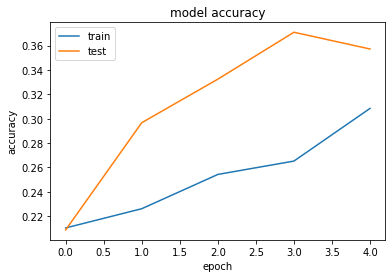

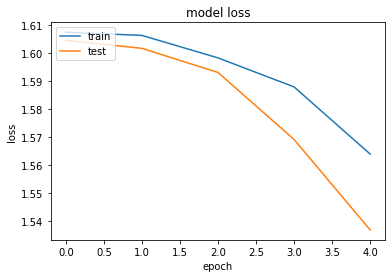

Epoch 1/5
12/12 [==============================] - 7s 256ms/step - loss: 1.5415 - accuracy: 0.3167 - val_loss: 1.5080 - val_accuracy: 0.4451
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_1_1.541477918624878/assets
Epoch 2/5
12/12 [==============================] - 7s 255ms/step - loss: 1.5030 - accuracy: 0.3235 - val_loss: 1.4458 - val_accuracy: 0.4698
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_2_1.502968192100525/assets
Epoch 3/5
12/12 [==============================] - 7s 252ms/step - loss: 1.4641 - accuracy: 0.3667 - val_loss: 1.3795 - val_accuracy: 0.4753
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_3_1.4640806913375854/assets
Epoch 4/5
12/12 [==============================] - 7s 259ms/step - loss: 1.4039 - accuracy: 0.3811 - val_loss: 1.3264 - val_accuracy: 0.5220
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_4_1.4039467573165894/assets
Epoch 5/5
12/12 [==============================] - 7s 258ms/step - loss: 1

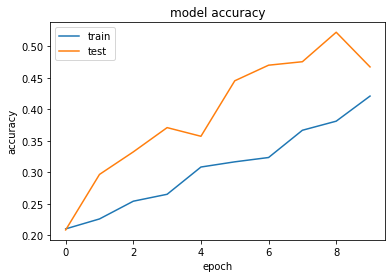

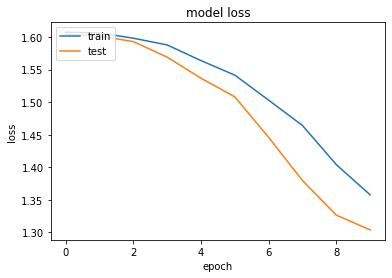

Epoch 1/5
12/12 [==============================] - 7s 259ms/step - loss: 1.3200 - accuracy: 0.4503 - val_loss: 1.2673 - val_accuracy: 0.4918
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_1_1.319985270500183/assets
Epoch 2/5
12/12 [==============================] - 7s 258ms/step - loss: 1.2606 - accuracy: 0.4695 - val_loss: 1.1863 - val_accuracy: 0.5522
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_2_1.2605674266815186/assets
Epoch 3/5
12/12 [==============================] - 7s 256ms/step - loss: 1.2095 - accuracy: 0.5079 - val_loss: 1.2099 - val_accuracy: 0.4973
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_3_1.209511160850525/assets
Epoch 4/5
12/12 [==============================] - 7s 254ms/step - loss: 1.2084 - accuracy: 0.5045 - val_loss: 1.1154 - val_accuracy: 0.5852
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_4_1.2083927392959595/assets
Epoch 5/5
12/12 [==============================] - 7s 257ms/step - loss: 1

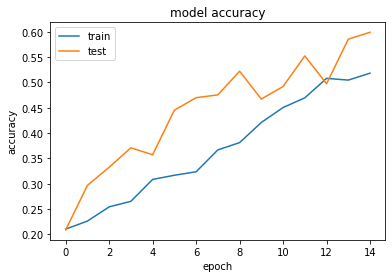

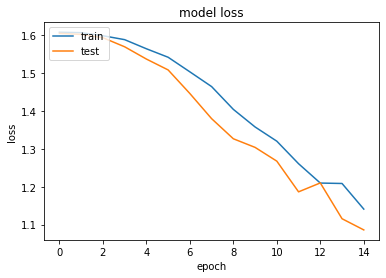

Epoch 1/5
12/12 [==============================] - 7s 259ms/step - loss: 1.1214 - accuracy: 0.5243 - val_loss: 1.0306 - val_accuracy: 0.6346
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_1_1.1214022636413574/assets
Epoch 2/5
12/12 [==============================] - 7s 257ms/step - loss: 1.0747 - accuracy: 0.5559 - val_loss: 1.0660 - val_accuracy: 0.5824
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_2_1.0747220516204834/assets
Epoch 3/5
12/12 [==============================] - 7s 258ms/step - loss: 1.0417 - accuracy: 0.5655 - val_loss: 1.0260 - val_accuracy: 0.6126
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_3_1.0417009592056274/assets
Epoch 4/5
12/12 [==============================] - 7s 256ms/step - loss: 1.0332 - accuracy: 0.5737 - val_loss: 1.0007 - val_accuracy: 0.6154
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_4_1.033152461051941/assets
Epoch 5/5
12/12 [==============================] - 7s 259ms/step - loss: 

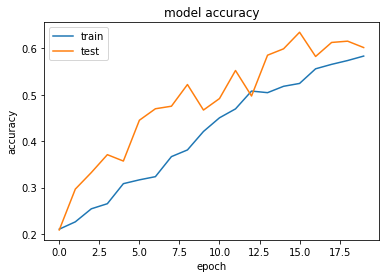

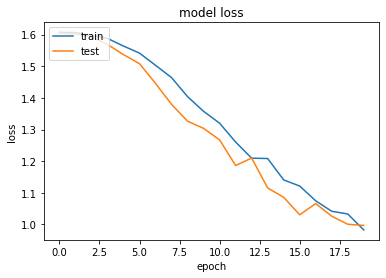

Epoch 1/5
12/12 [==============================] - 7s 258ms/step - loss: 0.9658 - accuracy: 0.6011 - val_loss: 0.9319 - val_accuracy: 0.6511
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_1_0.9657669067382812/assets
Epoch 2/5
12/12 [==============================] - 7s 257ms/step - loss: 0.9239 - accuracy: 0.6319 - val_loss: 0.9226 - val_accuracy: 0.6566
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_2_0.9238762259483337/assets
Epoch 3/5
12/12 [==============================] - 7s 259ms/step - loss: 0.9016 - accuracy: 0.6210 - val_loss: 0.8841 - val_accuracy: 0.6813
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_3_0.9016185402870178/assets
Epoch 4/5
12/12 [==============================] - 7s 255ms/step - loss: 0.8665 - accuracy: 0.6546 - val_loss: 0.8598 - val_accuracy: 0.6731
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_4_0.8664677739143372/assets
Epoch 5/5
12/12 [==============================] - 7s 257ms/step - loss:

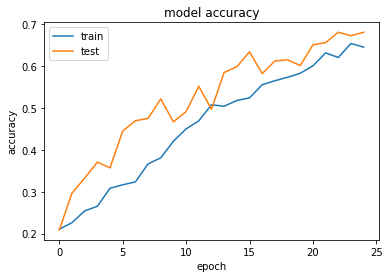

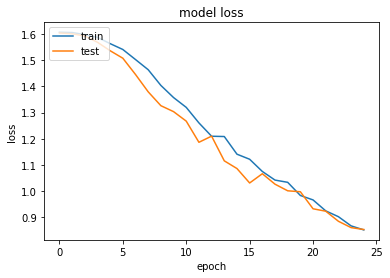

Epoch 1/5
12/12 [==============================] - 7s 256ms/step - loss: 0.8315 - accuracy: 0.6655 - val_loss: 0.8289 - val_accuracy: 0.7005
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_1_0.8315073251724243/assets
Epoch 2/5
12/12 [==============================] - 7s 255ms/step - loss: 0.7697 - accuracy: 0.6799 - val_loss: 0.8370 - val_accuracy: 0.6566
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_2_0.7697123289108276/assets
Epoch 3/5
12/12 [==============================] - 7s 255ms/step - loss: 0.7908 - accuracy: 0.6758 - val_loss: 0.7990 - val_accuracy: 0.7005
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_3_0.7908013463020325/assets
Epoch 4/5
12/12 [==============================] - 7s 254ms/step - loss: 0.7665 - accuracy: 0.6984 - val_loss: 0.7637 - val_accuracy: 0.7225
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_4_0.7664859890937805/assets
Epoch 5/5
12/12 [==============================] - 7s 260ms/step - loss:

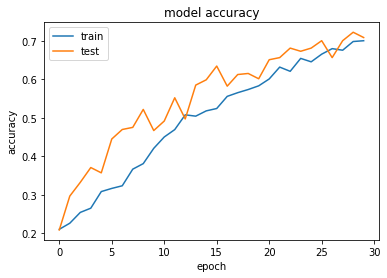

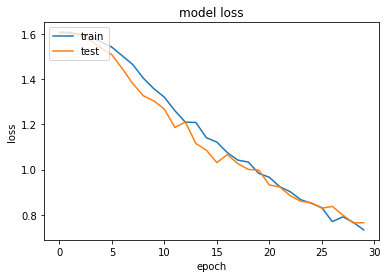

Epoch 1/5
12/12 [==============================] - 7s 258ms/step - loss: 0.7078 - accuracy: 0.7197 - val_loss: 0.7806 - val_accuracy: 0.6813
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_1_0.7077605128288269/assets
Epoch 2/5
12/12 [==============================] - 7s 259ms/step - loss: 0.6992 - accuracy: 0.7114 - val_loss: 0.7395 - val_accuracy: 0.7225
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_2_0.699230432510376/assets
Epoch 3/5
12/12 [==============================] - 8s 262ms/step - loss: 0.6698 - accuracy: 0.7327 - val_loss: 0.7816 - val_accuracy: 0.6703
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_3_0.6697835326194763/assets
Epoch 4/5
12/12 [==============================] - 8s 264ms/step - loss: 0.6724 - accuracy: 0.7341 - val_loss: 0.7749 - val_accuracy: 0.6951
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_4_0.6723921895027161/assets
Epoch 5/5
12/12 [==============================] - 7s 261ms/step - loss: 

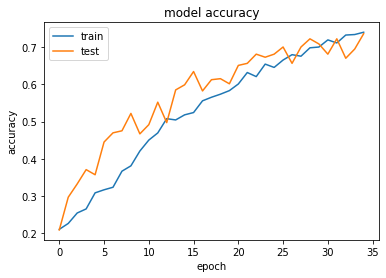

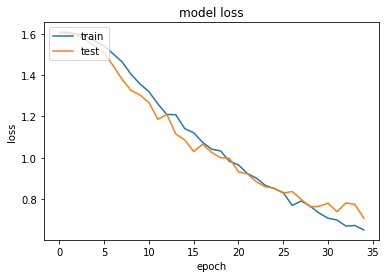

Epoch 1/5
12/12 [==============================] - 7s 260ms/step - loss: 0.6188 - accuracy: 0.7553 - val_loss: 0.7031 - val_accuracy: 0.7225
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_1_0.618761420249939/assets
Epoch 2/5
12/12 [==============================] - 7s 259ms/step - loss: 0.6275 - accuracy: 0.7457 - val_loss: 0.7686 - val_accuracy: 0.7005
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_2_0.627467691898346/assets
Epoch 3/5
12/12 [==============================] - 7s 258ms/step - loss: 0.6332 - accuracy: 0.7450 - val_loss: 0.7078 - val_accuracy: 0.7225
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_3_0.6332476735115051/assets
Epoch 4/5
12/12 [==============================] - 7s 256ms/step - loss: 0.5913 - accuracy: 0.7567 - val_loss: 0.7158 - val_accuracy: 0.7143
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_4_0.5912747383117676/assets
Epoch 5/5
12/12 [==============================] - 7s 261ms/step - loss: 0

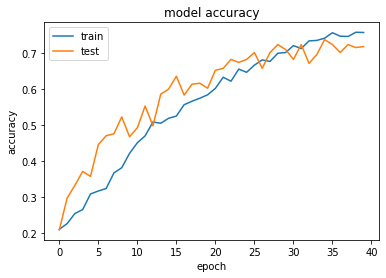

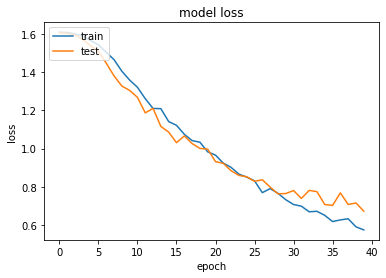

Epoch 1/5
12/12 [==============================] - 8s 261ms/step - loss: 0.5527 - accuracy: 0.7855 - val_loss: 0.7499 - val_accuracy: 0.6951
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_1_0.5527284741401672/assets
Epoch 2/5
12/12 [==============================] - 7s 260ms/step - loss: 0.5612 - accuracy: 0.7670 - val_loss: 0.6514 - val_accuracy: 0.7555
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_2_0.5612354278564453/assets
Epoch 3/5
12/12 [==============================] - 7s 259ms/step - loss: 0.5751 - accuracy: 0.7649 - val_loss: 0.6384 - val_accuracy: 0.7720
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_3_0.5751028656959534/assets
Epoch 4/5
12/12 [==============================] - 7s 256ms/step - loss: 0.5385 - accuracy: 0.7766 - val_loss: 0.6175 - val_accuracy: 0.7692
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_4_0.5384830832481384/assets
Epoch 5/5
12/12 [==============================] - 7s 257ms/step - loss:

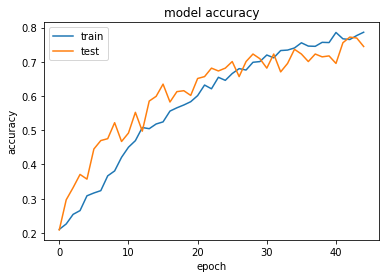

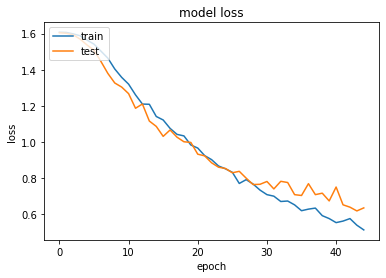

Epoch 1/5
12/12 [==============================] - 7s 262ms/step - loss: 0.5117 - accuracy: 0.7889 - val_loss: 0.6283 - val_accuracy: 0.7445
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_1_0.5117283463478088/assets
Epoch 2/5
12/12 [==============================] - 7s 262ms/step - loss: 0.4765 - accuracy: 0.8053 - val_loss: 0.6356 - val_accuracy: 0.7473
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_2_0.4764743149280548/assets
Epoch 3/5
12/12 [==============================] - 7s 261ms/step - loss: 0.4677 - accuracy: 0.8053 - val_loss: 0.6368 - val_accuracy: 0.7555
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_3_0.46765848994255066/assets
Epoch 4/5
12/12 [==============================] - 7s 261ms/step - loss: 0.4627 - accuracy: 0.8136 - val_loss: 0.6351 - val_accuracy: 0.7500
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_4_0.4626580774784088/assets
Epoch 5/5
12/12 [==============================] - 7s 263ms/step - loss

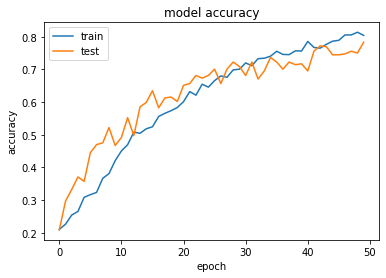

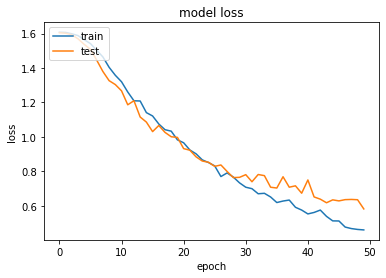

Epoch 1/5
12/12 [==============================] - 7s 263ms/step - loss: 0.4398 - accuracy: 0.8129 - val_loss: 0.5572 - val_accuracy: 0.7912
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_1_0.43975529074668884/assets
Epoch 2/5
12/12 [==============================] - 7s 259ms/step - loss: 0.4153 - accuracy: 0.8362 - val_loss: 0.6086 - val_accuracy: 0.7637
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_2_0.4153086245059967/assets
Epoch 3/5
12/12 [==============================] - 7s 259ms/step - loss: 0.4388 - accuracy: 0.8170 - val_loss: 0.5986 - val_accuracy: 0.7802
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_3_0.438805490732193/assets
Epoch 4/5
12/12 [==============================] - 7s 261ms/step - loss: 0.4023 - accuracy: 0.8321 - val_loss: 0.5494 - val_accuracy: 0.8049
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_4_0.40226325392723083/assets
Epoch 5/5
12/12 [==============================] - 7s 260ms/step - loss

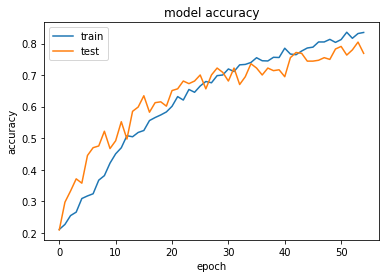

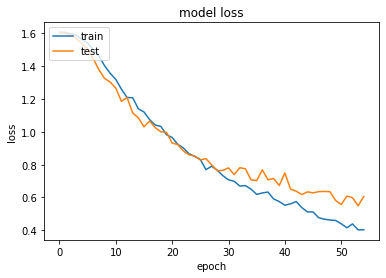

Epoch 1/5
12/12 [==============================] - 7s 260ms/step - loss: 0.3903 - accuracy: 0.8410 - val_loss: 0.5639 - val_accuracy: 0.7747
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_1_0.39032718539237976/assets
Epoch 2/5
12/12 [==============================] - 7s 258ms/step - loss: 0.4050 - accuracy: 0.8280 - val_loss: 0.5640 - val_accuracy: 0.7912
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_2_0.4050144553184509/assets
Epoch 3/5
12/12 [==============================] - 7s 260ms/step - loss: 0.3661 - accuracy: 0.8609 - val_loss: 0.5485 - val_accuracy: 0.7802
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_3_0.3661009669303894/assets
Epoch 4/5
12/12 [==============================] - 7s 257ms/step - loss: 0.3500 - accuracy: 0.8547 - val_loss: 0.6292 - val_accuracy: 0.7940
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_4_0.35000619292259216/assets
Epoch 5/5
12/12 [==============================] - 7s 260ms/step - los

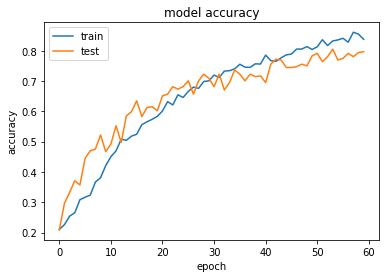

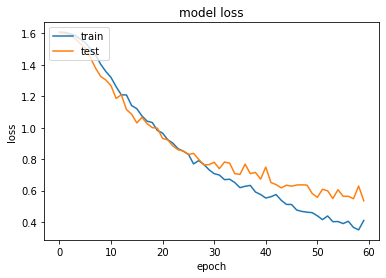

Epoch 1/5
12/12 [==============================] - 7s 258ms/step - loss: 0.3681 - accuracy: 0.8513 - val_loss: 0.5635 - val_accuracy: 0.7940
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_1_0.3680996298789978/assets
Epoch 2/5
12/12 [==============================] - 7s 257ms/step - loss: 0.3475 - accuracy: 0.8540 - val_loss: 0.5334 - val_accuracy: 0.8077
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_2_0.34749120473861694/assets
Epoch 3/5
12/12 [==============================] - 7s 257ms/step - loss: 0.3477 - accuracy: 0.8568 - val_loss: 0.5361 - val_accuracy: 0.7995
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_3_0.3477170467376709/assets
Epoch 4/5
12/12 [==============================] - 7s 262ms/step - loss: 0.3428 - accuracy: 0.8547 - val_loss: 0.5616 - val_accuracy: 0.7995
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_4_0.3428233563899994/assets
Epoch 5/5
12/12 [==============================] - 8s 265ms/step - loss

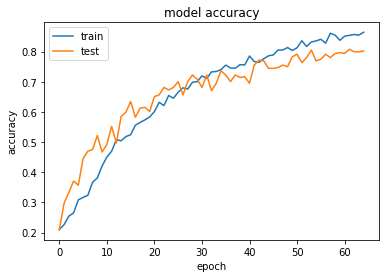

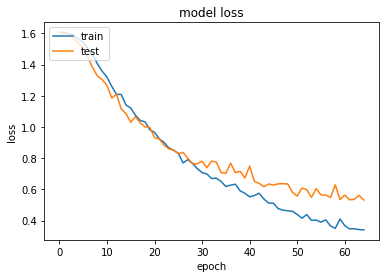

Epoch 1/5
12/12 [==============================] - 8s 262ms/step - loss: 0.3169 - accuracy: 0.8684 - val_loss: 0.5164 - val_accuracy: 0.8132
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_1_0.3168989419937134/assets
Epoch 2/5
12/12 [==============================] - 8s 264ms/step - loss: 0.3324 - accuracy: 0.8657 - val_loss: 0.5151 - val_accuracy: 0.8159
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_2_0.3324338495731354/assets
Epoch 3/5
12/12 [==============================] - 7s 262ms/step - loss: 0.3410 - accuracy: 0.8533 - val_loss: 0.5388 - val_accuracy: 0.8077
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_3_0.34100261330604553/assets
Epoch 4/5
12/12 [==============================] - 7s 261ms/step - loss: 0.3258 - accuracy: 0.8643 - val_loss: 0.5077 - val_accuracy: 0.8242
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_4_0.3258087635040283/assets
Epoch 5/5
12/12 [==============================] - 8s 265ms/step - loss

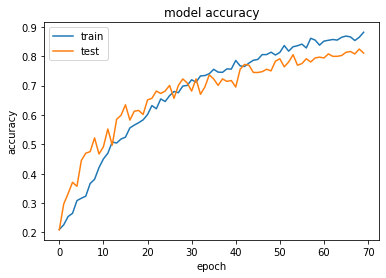

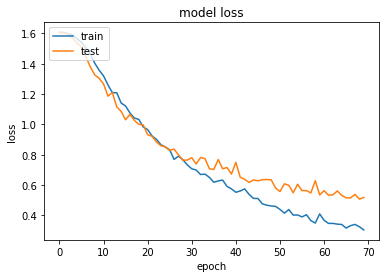

Epoch 1/5
12/12 [==============================] - 8s 265ms/step - loss: 0.2982 - accuracy: 0.8787 - val_loss: 0.5037 - val_accuracy: 0.8269
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_1_0.2982059121131897/assets
Epoch 2/5
12/12 [==============================] - 7s 263ms/step - loss: 0.3119 - accuracy: 0.8670 - val_loss: 0.5196 - val_accuracy: 0.8104
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_2_0.3118869364261627/assets
Epoch 3/5
12/12 [==============================] - 8s 264ms/step - loss: 0.2970 - accuracy: 0.8849 - val_loss: 0.5719 - val_accuracy: 0.7967
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_3_0.2970006763935089/assets
Epoch 4/5
12/12 [==============================] - 7s 262ms/step - loss: 0.3208 - accuracy: 0.8643 - val_loss: 0.5327 - val_accuracy: 0.8159
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_4_0.3207869827747345/assets
Epoch 5/5
12/12 [==============================] - 7s 264ms/step - loss:

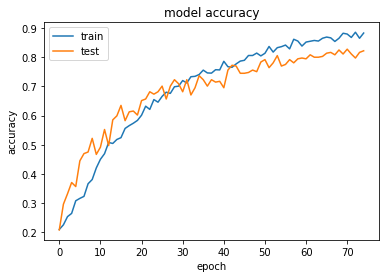

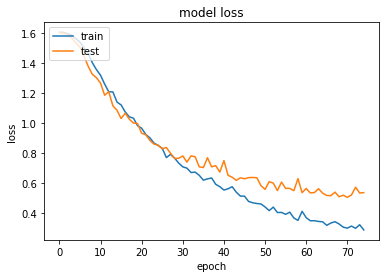

Epoch 1/5
12/12 [==============================] - 8s 265ms/step - loss: 0.2941 - accuracy: 0.8732 - val_loss: 0.5272 - val_accuracy: 0.8187
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_1_0.2941494584083557/assets
Epoch 2/5
12/12 [==============================] - 8s 263ms/step - loss: 0.2892 - accuracy: 0.8753 - val_loss: 0.5305 - val_accuracy: 0.8242
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_2_0.2891713082790375/assets
Epoch 3/5
12/12 [==============================] - 8s 264ms/step - loss: 0.2888 - accuracy: 0.8787 - val_loss: 0.5793 - val_accuracy: 0.7995
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_3_0.2888046205043793/assets
Epoch 4/5
12/12 [==============================] - 8s 263ms/step - loss: 0.2940 - accuracy: 0.8842 - val_loss: 0.5018 - val_accuracy: 0.8242
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_4_0.2939753830432892/assets
Epoch 5/5
12/12 [==============================] - 7s 260ms/step - loss:

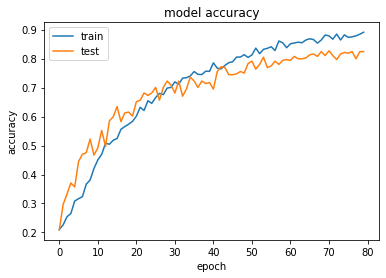

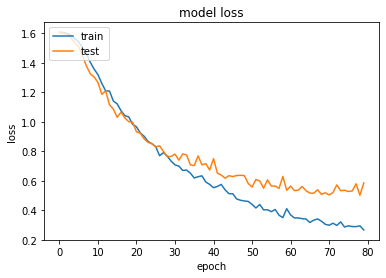

Epoch 1/5
12/12 [==============================] - 8s 265ms/step - loss: 0.2993 - accuracy: 0.8643 - val_loss: 0.5069 - val_accuracy: 0.8159
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_1_0.2993374466896057/assets
Epoch 2/5
12/12 [==============================] - 7s 262ms/step - loss: 0.2638 - accuracy: 0.8862 - val_loss: 0.5508 - val_accuracy: 0.8104
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_2_0.26383674144744873/assets
Epoch 3/5
12/12 [==============================] - 8s 263ms/step - loss: 0.2562 - accuracy: 0.8903 - val_loss: 0.5700 - val_accuracy: 0.8077
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_3_0.25617727637290955/assets
Epoch 4/5
12/12 [==============================] - 7s 263ms/step - loss: 0.2600 - accuracy: 0.8938 - val_loss: 0.4966 - val_accuracy: 0.8324
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_4_0.26000139117240906/assets
Epoch 5/5
12/12 [==============================] - 7s 264ms/step - lo

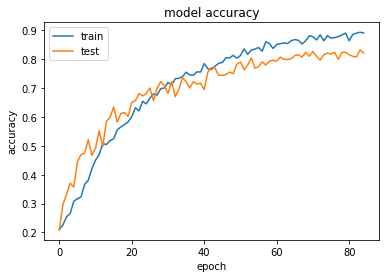

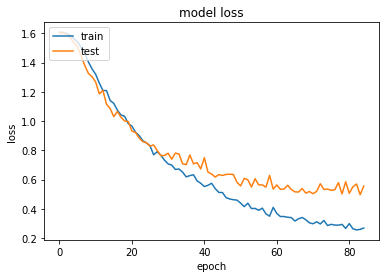

Epoch 1/5
12/12 [==============================] - 8s 267ms/step - loss: 0.2497 - accuracy: 0.8938 - val_loss: 0.5411 - val_accuracy: 0.8132
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_1_0.24965530633926392/assets
Epoch 2/5
12/12 [==============================] - 8s 266ms/step - loss: 0.2636 - accuracy: 0.8869 - val_loss: 0.5034 - val_accuracy: 0.8324
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_2_0.26363784074783325/assets
Epoch 3/5
12/12 [==============================] - 7s 263ms/step - loss: 0.2524 - accuracy: 0.8890 - val_loss: 0.4719 - val_accuracy: 0.8407
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_3_0.25238972902297974/assets
Epoch 4/5
12/12 [==============================] - 8s 264ms/step - loss: 0.2640 - accuracy: 0.8835 - val_loss: 0.4919 - val_accuracy: 0.8462
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_4_0.26403117179870605/assets
Epoch 5/5
12/12 [==============================] - 7s 261ms/step - l

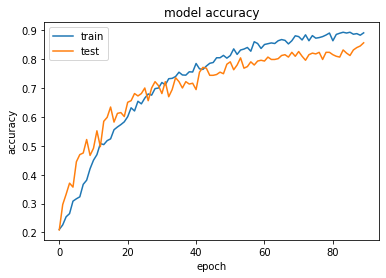

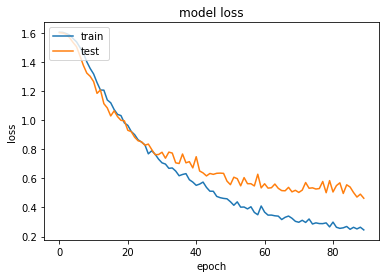

Epoch 1/5
12/12 [==============================] - 8s 263ms/step - loss: 0.2399 - accuracy: 0.8986 - val_loss: 0.4928 - val_accuracy: 0.8352
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_1_0.2398531436920166/assets
Epoch 2/5
12/12 [==============================] - 8s 263ms/step - loss: 0.1994 - accuracy: 0.9178 - val_loss: 0.5177 - val_accuracy: 0.8352
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_2_0.19944557547569275/assets
Epoch 3/5
12/12 [==============================] - 8s 264ms/step - loss: 0.2369 - accuracy: 0.9020 - val_loss: 0.4949 - val_accuracy: 0.8544
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_3_0.2368772178888321/assets
Epoch 4/5
12/12 [==============================] - 8s 264ms/step - loss: 0.2442 - accuracy: 0.9013 - val_loss: 0.4991 - val_accuracy: 0.8462
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_4_0.24420970678329468/assets
Epoch 5/5
12/12 [==============================] - 8s 266ms/step - los

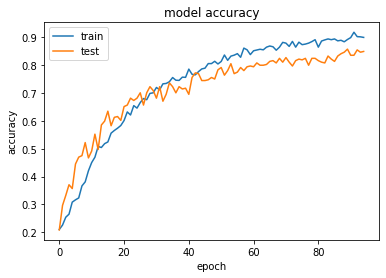

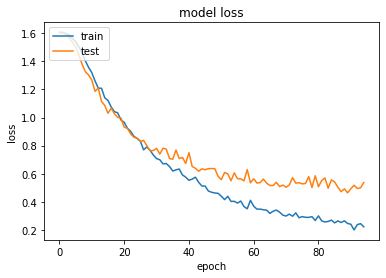

Epoch 1/5
12/12 [==============================] - 8s 267ms/step - loss: 0.2226 - accuracy: 0.9075 - val_loss: 0.5258 - val_accuracy: 0.8544
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_1_0.2226400226354599/assets
Epoch 2/5
12/12 [==============================] - 8s 264ms/step - loss: 0.2405 - accuracy: 0.8897 - val_loss: 0.4981 - val_accuracy: 0.8434
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_2_0.24045628309249878/assets
Epoch 3/5
12/12 [==============================] - 8s 266ms/step - loss: 0.2371 - accuracy: 0.9006 - val_loss: 0.4962 - val_accuracy: 0.8352
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_3_0.23714232444763184/assets
Epoch 4/5
12/12 [==============================] - 8s 265ms/step - loss: 0.2238 - accuracy: 0.9095 - val_loss: 0.5515 - val_accuracy: 0.8242
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_4_0.22379374504089355/assets
Epoch 5/5
12/12 [==============================] - 8s 265ms/step - lo

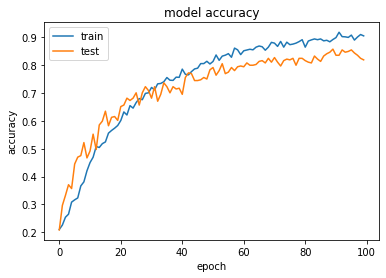

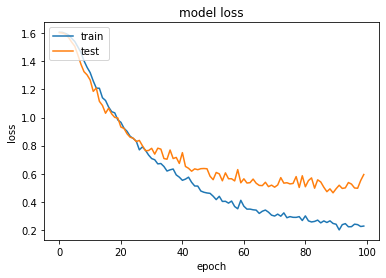

In [ ]:
epochs=100
all_history = {'accuracy': [], 'val_accuracy':[], 'loss':[], 'val_loss':[]}
for i in range(epochs // 5):
    history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    callbacks=[model_checkpoint]
    )
    all_history['accuracy']+=history.history['accuracy']
    all_history['val_accuracy'] += history.history['val_accuracy']
    all_history['loss'] += history.history['loss']
    all_history['val_loss'] += history.history['val_loss']
    print(all_history)
    draw_graph([all_history['accuracy'], all_history['val_accuracy']],
               [all_history['loss'], all_history['val_loss']])


In [ ]:
ls checkpoints/

modelcheckpoint_1_0.2226400226354599/   modelcheckpoint_3_0.46765848994255066/
modelcheckpoint_1_0.2398531436920166/   modelcheckpoint_3_0.5751028656959534/
modelcheckpoint_1_0.24965530633926392/  modelcheckpoint_3_0.6332476735115051/
modelcheckpoint_1_0.2941494584083557/   modelcheckpoint_3_0.6697835326194763/
modelcheckpoint_1_0.2982059121131897/   modelcheckpoint_3_0.7908013463020325/
modelcheckpoint_1_0.2993374466896057/   modelcheckpoint_3_0.9016185402870178/
modelcheckpoint_1_0.3168989419937134/   modelcheckpoint_3_1.0417009592056274/
modelcheckpoint_1_0.3680996298789978/   modelcheckpoint_3_1.209511160850525/
modelcheckpoint_1_0.39032718539237976/  modelcheckpoint_3_1.4640806913375854/
modelcheckpoint_1_0.43975529074668884/  modelcheckpoint_3_1.5982846021652222/
modelcheckpoint_1_0.5117283463478088/   modelcheckpoint_4_0.22379374504089355/
modelcheckpoint_1_0.5527284741401672/   modelcheckpoint_4_0.24420970678329468/
modelcheckpoint_1_0.618761420249939/    modelcheckpoint_4_0.26

## Много кода внизу нужно для скачивания весов с колаба

In [ ]:
#model.save('saved_model')

In [ ]:
#!zip -r modelcheckpoint.zip checkpoints/modelcheckpoint_1_0.5866274833679199

	zip warning: name not matched: checkpoints/modelcheckpoint_1_0.5866274833679199

zip error: Nothing to do! (try: zip -r modelcheckpoint.zip . -i checkpoints/modelcheckpoint_1_0.5866274833679199)


In [ ]:
#!unzip "/content/84percents_zipped" -d "/content/84_percents"